In [2]:
import pandas_datareader as pdr
import pandas as pd

In [3]:
#!pip uninstall -y numpy pandas tensorflow keras pandas_datareader
#!pip install numpy==1.23.5 pandas==1.5.3 tensorflow==2.12.1 keras==2.12.0 pandas_datareader==0.10.0

In [4]:
#pip install --force-reinstall pandas==1.5.3 numpy==1.23.5

In [5]:
#pip install --upgrade pandas_datareader

In [6]:
#pip install pandas==1.5.3

In [7]:
df = pdr.get_data_tiingo('AAPL', api_key='74991963523f55f29ef9c6f37b8d2ef924df5d19')

/tmp/ipython-input-7-2720725712.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key='74991963523f55f29ef9c6f37b8d2ef924df5d19')


In [8]:
df.to_csv('AAPL.csv')

In [9]:
data = pd.read_csv('AAPL.csv')

In [10]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2020-07-22 00:00:00+00:00,389.09,391.9000,386.410,386.7700,22250413,94.561878,95.244802,93.910549,93.998041,89001652,0.0,1.0
1,AAPL,2020-07-23 00:00:00+00:00,371.38,388.3100,368.039,387.9935,49251108,90.257756,94.372312,89.445781,94.295392,197004432,0.0,1.0
2,AAPL,2020-07-24 00:00:00+00:00,370.46,371.8800,356.580,363.9500,46359716,90.034165,90.379273,86.660861,88.452018,185438864,0.0,1.0
3,AAPL,2020-07-27 00:00:00+00:00,379.24,379.6200,373.920,374.8400,30303548,92.167999,92.260352,90.875061,91.098652,121214192,0.0,1.0
4,AAPL,2020-07-28 00:00:00+00:00,373.01,378.1986,372.990,377.4700,25906375,90.653901,91.914904,90.649040,91.737830,103625500,0.0,1.0


In [11]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1249,AAPL,2025-07-14 00:00:00+00:00,208.62,210.91,207.5400,209.925,38840111,208.62,210.91,207.5400,209.925,38840111,0.0,1.0
1250,AAPL,2025-07-15 00:00:00+00:00,209.11,211.89,208.9200,209.220,42296339,209.11,211.89,208.9200,209.220,42296339,0.0,1.0
1251,AAPL,2025-07-16 00:00:00+00:00,210.16,212.40,208.6400,210.295,47490532,210.16,212.40,208.6400,210.295,47490532,0.0,1.0
1252,AAPL,2025-07-17 00:00:00+00:00,210.02,211.80,209.5900,210.570,48068141,210.02,211.80,209.5900,210.570,48068141,0.0,1.0
1253,AAPL,2025-07-18 00:00:00+00:00,211.18,211.79,209.7045,210.870,48974591,211.18,211.79,209.7045,210.870,48974591,0.0,1.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 0 to 1253
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1254 non-null   object 
 1   date         1254 non-null   object 
 2   close        1254 non-null   float64
 3   high         1254 non-null   float64
 4   low          1254 non-null   float64
 5   open         1254 non-null   float64
 6   volume       1254 non-null   int64  
 7   adjClose     1254 non-null   float64
 8   adjHigh      1254 non-null   float64
 9   adjLow       1254 non-null   float64
 10  adjOpen      1254 non-null   float64
 11  adjVolume    1254 non-null   int64  
 12  divCash      1254 non-null   float64
 13  splitFactor  1254 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.3+ KB


In [13]:
data1 = data['close']

In [14]:
data1.shape

(1254,)

In [15]:
data1

,close
0,389.09
1,371.38
2,370.46
3,379.24
4,373.01
...,...
1249,208.62
1250,209.11
1251,210.16
1252,210.02


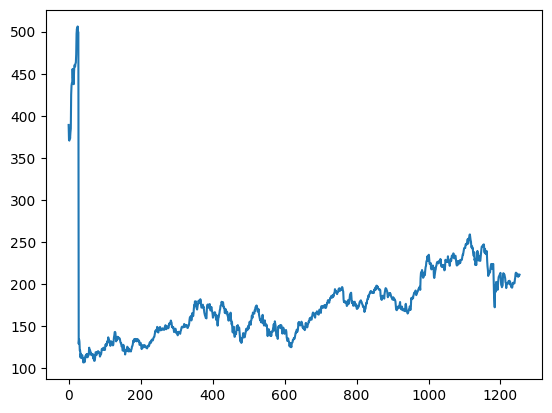

In [16]:
import matplotlib.pyplot as plt
plt.plot(data1)


In [17]:
 import numpy as np

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(np.array(data1).reshape(-1,1))

In [19]:
print(data_scaled.shape)

(1254, 1)


In [20]:
data_scaled

array([[0.70695053],
       [0.66259236],
       [0.66028804],
       ...,
       [0.25878522],
       [0.25843456],
       [0.26134001]])

In [21]:
training_size = int(len(data_scaled)*0.65)
test_size = len(data_scaled) - training_size
train_data, test_data = data_scaled[0:training_size,:], data_scaled[training_size:len(data_scaled),:1]

In [22]:
training_size, test_size

(815, 439)

In [23]:
len(train_data), len(test_data)

(815, 439)

In [24]:
def creae_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
from datetime import time
time_step = 100           # X = t, t+1, t+2, t+3    AND y = t+4
X_train, y_train = creae_dataset(train_data, time_step)
X_test, y_test = creae_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(714, 100)
(714,)


(None, None)

In [27]:
print(X_test.shape), print(y_test.shape)

(338, 100)
(338,)


(None, None)

In [28]:
X_train

array([[0.70695053, 0.66259236, 0.66028804, ..., 0.04393237, 0.03742016,
        0.04107702],
       [0.66259236, 0.66028804, 0.68227927, ..., 0.03742016, 0.04107702,
        0.03899812],
       [0.66028804, 0.68227927, 0.66667502, ..., 0.04107702, 0.03899812,
        0.03742016],
       ...,
       [0.17084534, 0.17112085, 0.16871634, ..., 0.17695679, 0.18071384,
        0.17921102],
       [0.17112085, 0.16871634, 0.16210394, ..., 0.18071384, 0.17921102,
        0.18274264],
       [0.16871634, 0.16210394, 0.16280526, ..., 0.17921102, 0.18274264,
        0.18502192]])

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:
## Creating stacked LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 355ms/step - loss: 0.0030 - val_loss: 0.0150
Epoch 2/100
12/12 [==============================] - 2s 208ms/step - loss: 9.7967e-04 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 2s 207ms/step - loss: 5.9088e-04 - val_loss: 0.0012
Epoch 4/100
12/12 [==============================] - 3s 270ms/step - loss: 3.7009e-04 - val_loss: 6.8080e-04
Epoch 5/100
12/12 [==============================] - 3s 220ms/step - loss: 3.4309e-04 - val_loss: 6.6498e-04
Epoch 6/100
12/12 [==============================] - 2s 204ms/step - loss: 3.1770e-04 - val_loss: 8.5739e-04
Epoch 7/100
12/12 [==============================] - 2s 203ms/step - loss: 3.0763e-04 - val_loss: 6.8578e-04
Epoch 8/100
12/12 [==============================] - 3s 224ms/step - loss: 2.8995e-04 - val_loss: 7.9842e-04
Epoch 9/100
12/12 [==============================] - 4s 303ms/step - loss: 2.9413e-04 - val_loss: 5.8633e-04
Epoch 10/100
12/12 [==============

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.12.1'

In [37]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 39ms/step


In [38]:
# Tranforming back to the original form using inverser_transform
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [39]:
## Calculating the RMSE for performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

154.4075889111992

In [40]:
math.sqrt(mean_squared_error(y_test, test_predict))

213.42162149463002

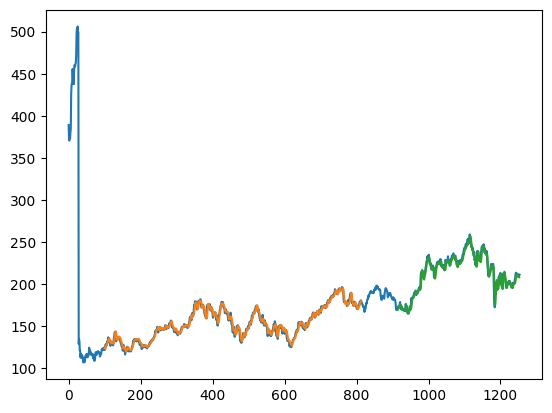

In [41]:
## Plot the predictions

look_back = 100
train_predictPlot = np.empty_like(data_scaled)
train_predictPlot[:,:] = np.nan
train_predictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting

test_predictPlot = np.empty_like(data_scaled)
test_predictPlot[:,:] = np.nan
test_predictPlot[len(train_predict)+(look_back*2)+1:len(data_scaled)-1, :] = test_predict

# Plot Baseline

plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(train_predictPlot)
plt.plot(test_predictPlot)
plt.show()

In [42]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 98)

In [43]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [46]:
# Prediction for next 30 days

lst_output = []
n_steps = 100
i = 0

while i < 30:
    # Ensure temp_input has exactly n_steps values
    temp_array = np.array(temp_input[-n_steps:])  # take last n_steps
    if len(temp_array) < n_steps:
        # pad with zeros if not enough data
        temp_array = np.pad(temp_array, (n_steps - len(temp_array), 0), mode='constant')

    # Reshape to LSTM input format
    x_input = temp_array.reshape((1, n_steps, 1))

    # Predict next value
    yhat = model.predict(x_input, verbose=0)

    # Logging
    print(f"{i+1} day input: {temp_array}")
    print(f"{i+1} day output: {yhat[0]}")

    # Append prediction
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])

    i += 1

print("\n30-Day Forecast Output:")
print(lst_output)

1 day input: [0.         0.         0.32676268 0.338134   0.32859111 0.32333125
 0.32285535 0.32182843 0.33119599 0.30216656 0.28553538 0.27586725
 0.25758297 0.26712586 0.26840326 0.2651221  0.27150908 0.26865373
 0.27909831 0.28525986 0.29282405 0.28726362 0.29307451 0.27817157
 0.28876644 0.29142142 0.2931747  0.24132749 0.20423294 0.18690044
 0.16425798 0.23045711 0.20934252 0.22870382 0.23964934 0.23869756
 0.2189856  0.22577332 0.21620539 0.23268629 0.24485911 0.25430182
 0.25658109 0.25873513 0.26141515 0.26464621 0.26670006 0.24673763
 0.23055729 0.22960551 0.2239449  0.22705072 0.2296556  0.26036318
 0.26572323 0.26422041 0.26201628 0.26154039 0.25532874 0.25051972
 0.23857232 0.23674389 0.22149029 0.23386349 0.23438948 0.23321227
 0.2354665  0.23759549 0.24152786 0.24040075 0.23491547 0.24315592
 0.23696932 0.24002505 0.23028178 0.23133375 0.22444584 0.22938009
 0.22241703 0.22477145 0.2358422  0.23709455 0.23408892 0.23724483
 0.2358422  0.23604258 0.24628679 0.25292423 0.26

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
len(data_scaled)

1254